10.176785945892334 seconds


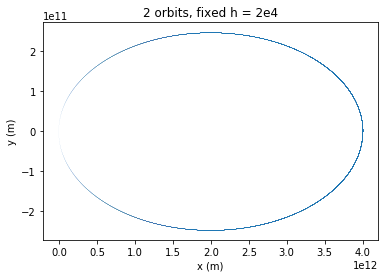

In [8]:
##Part a - fixed step size
#parameters
from numpy import sqrt, arange, array
from pylab import plot, xlabel, ylabel, show, title
import time

start = time.time()
def f(r):
    # unpack variable
    x, y = r[0], r[1]
    vx, vy = r[2], r[3]
    # function 
    d = sqrt(x**2 + y**2)
    fx = vx         # dx/dt = vx
    fy = vy        # dy/dt = vy
    fvx = -G*M*x/(d**3) #d^2x/dt^2 = fvx
    fvy = -G*M*y/(d**3) #d^2y/dt^2 = fvx
    return array([fx, fy, fvx, fvy], float) #dr

h = 2e4
M = 1.989e30  #kg
G = 6.67e-11  #Nm^2/kg^2
x0 = 4e12  #m
y0 = 0.00 #m
vx0 = 0.00 #m/s
vy0 = 500.0 #m/s
xpoints = [x0]
ypoints = [y0]


r = array([x0, y0, vx0, vy0], float)

norbit = 0
while norbit < 2:
    yold = r[1]
    #4th order Runge Kutta
    k1 = h*f(r)
    k2 = h*f(r + 0.5*k1)
    k3 = h*f(r + 0.5*k2)
    k4 = h*f(r + k3)
    r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    xpoints.append(r[0])
    ypoints.append(r[1])
    ynew = r[1]
    if yold < 0 and ynew > 0:
        norbit += 1

print(time.time() - start, "seconds")
# plot results
plot(xpoints, ypoints, ".", markersize=0.01)
title("2 orbits, fixed h = 2e4")
xlabel("x (m)")
ylabel("y (m)")
show()


0.11347317695617676 seconds


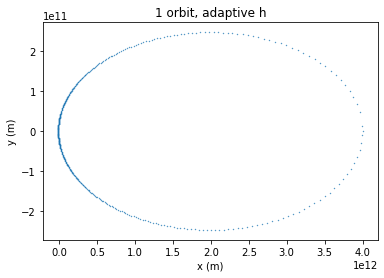

In [64]:
##Part b - adaptive step size
#parameters
from numpy import sqrt, arange, array
from pylab import plot, xlabel, ylabel, show, title

import time

start = time.time()

def f(r):
    # unpack variable
    x, y = r[0], r[1]
    vx, vy = r[2], r[3]
    # function 
    d = sqrt(x**2 + y**2)
    fx = vx         # dx/dt = vx
    fy = vy        # dy/dt = vy
    fvx = -G*M*x/(d**3) #d^2x/dt^2 = fvx
    fvy = -G*M*y/(d**3) #d^2y/dt^2 = fvx
    return array([fx, fy, fvx, fvy], float) #dr

t = 0
h = 5e7
M = 1.989e30  #kg
G = 6.67e-11  #Nm^2/kg^2
x0 = 4e12  #m
y0 = 0.00 #m
vx0 = 0.00 #m/s
vy0 = 500.0 #m/s
xpoints = [x0]
ypoints = [y0]
delta = 3.17098e-5             # desired accuracy (m per second)

r = array([x0, y0, vx0, vy0], float)

norbit = 0
while norbit < 1:
    
    # do one large step
    k1 = 2*h*f(r)
    k2 = 2*h*f(r + 0.5*k1)
    k3 = 2*h*f(r + 0.5*k2)
    k4 = 2*h*f(r + k3)
    r1 = r + (k1 + 2*k2 + 2*k3 + k4)/6
    
    # do two small steps
    k1 = h*f(r)
    k2 = h*f(r + 0.5*k1)
    k3 = h*f(r + 0.5*k2)
    k4 = h*f(r + k3)
    r2 = r + (k1 + 2*k2 + 2*k3 + k4)/6
    
    k1 = h*f(r2)
    k2 = h*f(r2 + 0.5*k1)
    k3 = h*f(r2 + 0.5*k2)
    k4 = h*f(r2 + k3)
    r2 += (k1 + 2*k2 + 2*k3 + k4)/6
    
    # calculate rho
    x1 = r1[0]
    x2 = r2[0]
    rho = 30*h*delta/abs(x1-x2)
    
    # if rho >= 1.0, increase step size, save data
    if rho >= 1.0:
        h *= min(rho**0.25, 2.0)  # increase h
        
        yold = r[1]               
        r = r2                    # update r
        ynew = r[1]
        
        # determine if particle crossed x = 0 from left to right
        if yold < 0 and ynew > 0:
            norbit += 1
        
        # save data
        xpoints.append(r[0])
        ypoints.append(r[1])
        
    # if rho <= 1.0, decrease step size, repeat   
    else:
        h *= rho**0.25
    

print(time.time() - start, "seconds")
# plot results
plot(xpoints, ypoints, ".", markersize=0.75)
title("1 orbit, adaptive h")
xlabel("x (m)")
ylabel("y (m)")
show()


Note the difference in the time it takes to compute part a (around 10 seconds) compared to part b (less than a second), without loss of major accuracy. For fixed h, I found that h = 2e4 is good enough to accurately compute the full orbit so that the comet comes back to exactly where it started